In [1]:
%load_ext rpy2.ipython
%matplotlib inline

from neuralprophet import Prophet
import pandas as pd
import logging
import warnings

logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

### Forecasting Growth

By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

Prophet allows you to make forecasts using a [logistic growth](https://en.wikipedia.org/wiki/Logistic_function) trend model, with a specified carrying capacity. We illustrate this with the log number of page visits to the [R (programming language)](https://en.wikipedia.org/wiki/R_%28programming_language%29) page on Wikipedia:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

We must specify the carrying capacity in a column `cap`. Here we will assume a particular value, but this would usually be set using data or expertise about the market size.

In [3]:
df['cap'] = 8.5

The important things to note are that `cap` must be specified for every row in the dataframe, and that it does not have to be constant. If the market size is growing, then `cap` can be an increasing sequence.

We then fit the model as before, except pass in an additional argument to specify logistic growth:

In [4]:
m = Prophet(growth='logistic')
m.fit(df)

ERROR - (NP.config.__post_init__) - Invalid trend growth 'logistic'. Set to 'linear'


{'self': <neuralprophet.wrapper.Prophet object at 0x16a7ace50>, 'growth': 'logistic', 'changepoints': None, 'n_changepoints': 25, 'changepoints_range': 0.8, 'trend_reg': 0, 'trend_reg_threshold': False, 'yearly_seasonality': 'auto', 'weekly_seasonality': 'auto', 'daily_seasonality': 'auto', 'seasonality_mode': 'additive', 'seasonality_reg': 0, 'n_forecasts': 1, 'n_lags': 0, 'num_hidden_layers': 0, 'd_hidden': None, 'ar_reg': None, 'learning_rate': None, 'epochs': None, 'batch_size': None, 'loss_func': 'Huber', 'optimizer': 'AdamW', 'newer_samples_weight': 2, 'newer_samples_start': 0.0, 'uncertainty_method': 'auto', 'prediction_interval': 0.8, 'quantiles': None, 'impute_missing': True, 'impute_linear': 10, 'impute_rolling': 10, 'drop_missing': False, 'collect_metrics': True, 'normalize': 'auto', 'global_normalization': False, 'global_time_normalization': True, 'unknown_data_normalization': False}


NotImplementedError: Saturating forecasts using cap is not supported in NeuralProphet.

We make a dataframe for future predictions as before, except we must also specify the capacity in the future. Here we keep capacity constant at the same value as in the history, and forecast 5 years into the future:

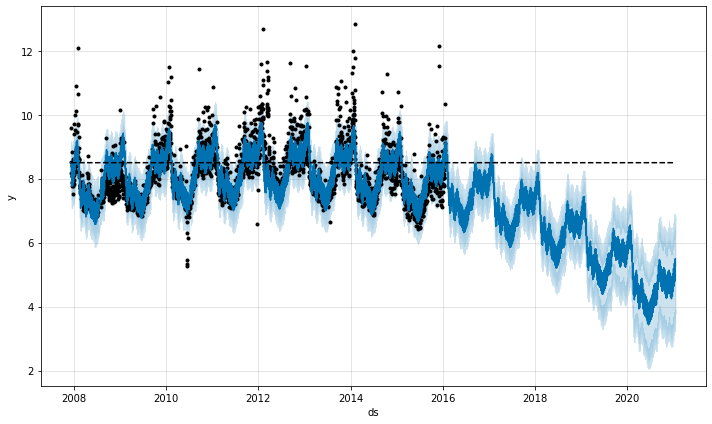

In [ ]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

The logistic function has an implicit minimum of 0, and will saturate at 0 the same way that it saturates at the capacity. It is possible to also specify a different saturating minimum.

### Saturating Minimum

The logistic growth model can also handle a saturating minimum, which is specified with a column `floor` in the same way as the `cap` column specifies the maximum:

Initial log joint probability = -242.439
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4261.83    0.00233504        180.49           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4268.75    0.00129307       110.934           1           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4276.71   5.54351e-05       109.281      0.5563      0.5563      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       4277.14   1.40701e-05       100.651   1.881e-07       0.001      530  LS failed, Hessian reset 
     385       4277.18   1.04964e-05       71.4105   1.076e-07       0.001      616  LS failed, Hessian reset 
     399       4277.18   1.65266e-06       50.5573      0.4399      0.4399      639   
    Iter      log pro

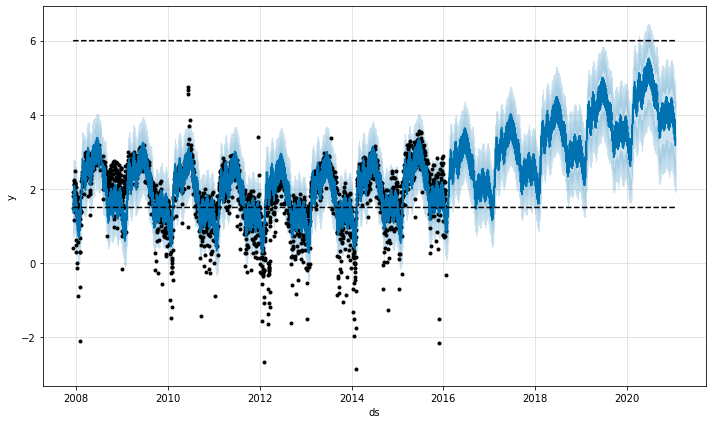

In [ ]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.